In [1]:
import numpy as np #numpy
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Plot diagrams
from sklearn.decomposition   import PCA #Principal Component Analysis
from sklearn.model_selection import KFold #Cross Validation
from sklearn.naive_bayes     import GaussianNB #Naive Bayes
from sklearn.linear_model    import LinearRegression #Linear Regression
from sklearn.metrics         import accuracy_score #Prediction of accuracy
%matplotlib inline

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None) #Read the dataset 
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
columns = ['clm1', 'clm2', 'clm3', 'clm4', 'clm5', 'clm6', 'clm7', 'clm8', 'diabetes'] #Give the name of columns
dataset.columns = columns
X = dataset.drop('diabetes', axis=1) #Drop label column
y = dataset['diabetes'] #Store label column
X

,clm1,clm2,clm3,clm4,clm5,clm6,clm7,clm8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
# Reduce the dimension of the dataset to 2
pca = PCA(n_components=2) 
X_new = pca.fit_transform(X) #New form of dataset
X_new

array([[-75.71465491, -35.95078264],
       [-82.3582676 ,  28.90821322],
       [-74.63064344, -67.90649647],
       ...,
       [ 32.11319827,   3.3766648 ],
       [-80.21449431, -14.18601977],
       [-81.30814972,  21.62149606]])

In [5]:
kf = 2    # Cross validation value                                   
kfold = KFold(n_splits=kf) # KFold Model : Splitting 2 fold test and train data
NaiveBayes_model = GaussianNB() # Model for Gaussian Naive Bayes
LinearRegress_model = LinearRegression() # Model for Linear Regression

# Saving train and test datasets and accuracy to use again for plots.
test_sets = [] 
NBaccuracy = []
LRaccuracy = []
NBpreds = []
LRpreds = []

i = 0
for train_index , test_index in kfold.split(X_new): #Spilitting the indices for every fold.
    X_train, X_test = X_new[train_index], X_new[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    test_sets.append(X_test) # Store test set 

    NaiveBayes_model.fit(X_train,y_train) # Train NB model that we created.
    LinearRegress_model.fit(X_train, y_train) # Train LR model that we created.
    NBpreds.append(NaiveBayes_model.predict(X_test)) #Store the NB predictions

    LR_pred = LinearRegress_model.predict(X_test) 
    LR_pred[LR_pred < LR_pred.mean()] = 0  # If prediction results are less than mean value class label is 0
    LR_pred[LR_pred >= LR_pred.mean()] = 1 #Otherwise 1
    LRpreds.append(LR_pred) #Store the LR predictions

    NBaccuracy.append(accuracy_score(NBpreds[i], y_test)) #Stores NB accuracy scores
    LRaccuracy.append(accuracy_score(LRpreds[i], y_test)) #Stores LR accuracy scores

    print("NB Fold %d, Accuracy: %f"%(i,NBaccuracy[i])) #Print the accuracies of algorithms for each fold.
    print("LR Fold %d, Accuracy: %f"%(i,LRaccuracy[i]))
    i += 1

NB Fold 0, Accuracy: 0.716146
LR Fold 0, Accuracy: 0.697917
NB Fold 1, Accuracy: 0.770833
LR Fold 1, Accuracy: 0.718750


In [6]:
print("NB Average Accuracy: %f"%(np.sum(NBaccuracy)/kf)) #Print average accuracy (total of folds) for NB
print("LR Average Accuracy: %f"%(np.sum(LRaccuracy)/kf)) #Print average accuracy (total of folds) for LR

NB Average Accuracy: 0.743490
LR Average Accuracy: 0.708333


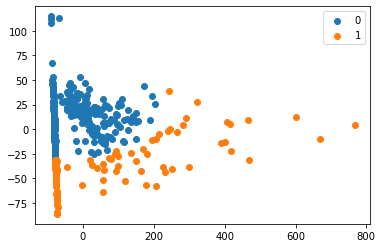

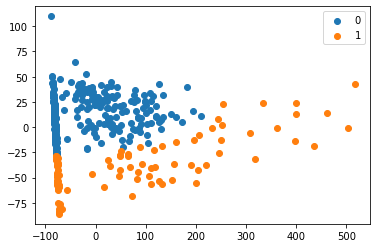

In [7]:
#Plot Naive Bayes Distribution
for i in range(kf):
    y = NBpreds[i]# Taken saved prediction results belongs to NB
    X_test = test_sets[i] # Taken saved test data for each fold
    label_names = np.unique(y) # Get unique label names
    for j in label_names: # Plot distribution
        plt.scatter(X_test[y == j , 0] , X_test[y == j , 1] , label = j)
    plt.legend()
    plt.show()

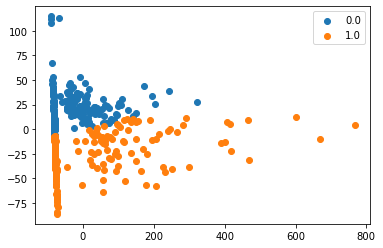

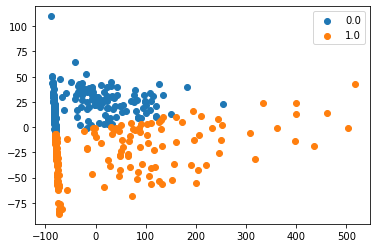

In [8]:
#Plot Linear Regression Distribution
for i in range(kf):
    y = LRpreds[i] # Taken saved prediction results belongs to LR
    X_test = test_sets[i] # Taken saved test data for each fold
    label_names = np.unique(y) # Get unique label names
    for j in label_names: # Plot distribution
        plt.scatter(X_test[y == j , 0] , X_test[y == j , 1] , label = j)
    plt.legend()
    plt.show()